<table style="width:100%; background-color:transparent; font-style:italic">
  <tr style="background-color:transparent">   
    <td style="text-align:left; background-color:transparent">Datenanalyse mit Python</td>
    <td style="text-align:right; background-color:transparent">Manfred Hammerl</td>
  </tr>
</table>

# 9) Variablen berechnen

Thema dieses Kapitels sind div. Möglichkeiten, neue Werte bzw. neue Variablen aus bestehenden Werten bzw. Variablen zu berechnen. Dabei wird auf in den Sozialwissenschaften besonders häufige Verfahren (bspw. das Bilden eines Mittelwert- bzw. Summenindex) eingegangen. Die gezeigten Berechnungsmethoden sollten sich aber in weiterer Folge problemlos auf andere unterschiedlichste Bedürfnisse übertragen lassen.

In [1]:
import pandas as pd

daten = pd.read_csv("C:\\Datenfiles\\daten.csv")

daten.head(3).round(2)

,sex,age,wohnort,volksmusik,hardrock
0,1,50,2,2.67,3.67
1,1,57,1,1.00,3.33
2,2,66,3,2.00,4.33


### 9.1) Neue Variable berechnen

Beginnen wir mit einem einfachen Beispiel: Es soll im Folgenden aus den beiden Variablen *volksmusik* und *hardrock* ein einfacher Index gebildet werden, welcher angibt, ob man lieber Volksmusik, lieber Hardrock oder beides in etwa gleich gerne hört. Dazu müssen wir nur die Werte einer Variable von den Werten der anderen Variable abziehen und in einer neuen Variable speichern.

Die berechneten Indexwerte werden zwischen -4 und +4 liegen. Wenn wir die Werte von *hardrock* von *volksmusik* abziehen bedeutet dies: Je niedriger die Werte, desto eher präferiert jemand Volksmusik gegenüber Hardrock (je höher: umgekehrt. 0 = völlig ausgeglichen). Die neue Variable heißt *Volksm-Hardr*.

In [2]:
daten["Volksm-Hardr"] = (daten["volksmusik"]-daten['hardrock']) # Werte von -4 bis +4 sind möglich, 0 = Mittelwert

daten.head().round(2)

,sex,age,wohnort,volksmusik,hardrock,Volksm-Hardr
0,1,50,2,2.67,3.67,-1.00
1,1,57,1,1.00,3.33,-2.33
2,2,66,3,2.00,4.33,-2.33
3,1,50,2,2.33,2.67,-0.33
4,1,60,3,2.33,3.00,-0.67


##### Grafische Darstellung

Es bietet sich an, neu berechnete Variablen gleich anzusehen bzw. zu prüfen, bspw. mittels Häufigkeitsanalyse oder mit grafischen Verfahren. Sehen wir uns nach einer ersten deskriptiven Auswertungen einige Grafiken mit der neuen Variable *Volksm-Hardr* an. Den Anfang macht ein Histogramm, welches mit der Funktion **plot.hist()** aufgerufen wird. Dies weist Ähnlichkeiten mit einem Säulendiagramm auf, jedoch wird nicht jede Ausprägung der Variable mit einer Säule dargestellt sondern die Säulen repräsentieren - je nach Einstellung - meist mehrere Werte der Variablen. Die Säulen stehen für zusammengefasste Kategorien gleicher Breite (Spannweite) - die Anzahl der darzustellenden Kategorien kann mit dem Parameter *bins* beliebig eingestellt werden. Je höher die Anzahl der Kategorien, desto detaillierter die Darstellung.

In [3]:
daten["Volksm-Hardr"].value_counts().sort_index() # um zu prüfen, ob die berechneten Werte tatsächlich nur von -4 bis +4 gehen

-4.000000     2
-3.333333     3
-3.000000     4
-2.666667     3
-2.500000     1
             ..
 3.333333     2
 3.333333     2
 3.666667     4
 3.666667     6
 4.000000    10
Name: Volksm-Hardr, Length: 67, dtype: int64

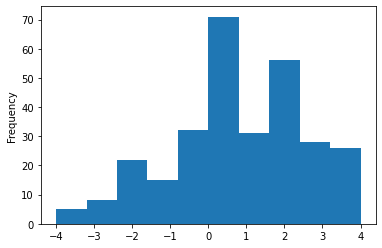

In [4]:
ax = daten['Volksm-Hardr'].plot.hist(bins = 10) # In diesem Fall sollen zehn Kategorien angezeigt werden.

Wir können uns auch den Zusammenhang unserer neu berechneten Variable mit dem Alter der Befragten ansehen. Es zeigt sich, dass ältere Personen eher Volksmusik präferieren, jüngere eher Hardrock.

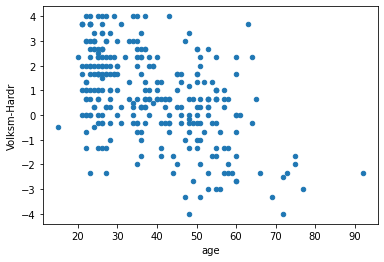

In [5]:
ax = daten.plot.scatter(x = 'age', y = 'Volksm-Hardr', rot = 0)

In diese Grafik können wir auch noch das Geschlecht als dritte Variable einfügen. Violett sind hier die Frauen (1), gelb die Männer (2) dargestellt. Es ist rein optisch kein besonderer Unterschied zwischen den Geschlechtern zu erkennen. Der zuvor postulierte Zusammenhang zwischen unserer neuen Variable und dem Alter zeigt sich für beide Geschlechter in ähnlicher Weise.

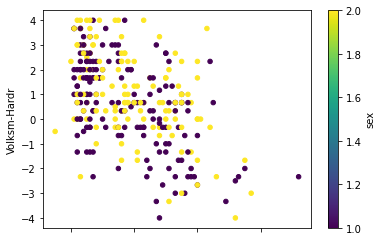

In [6]:
ax = daten.plot.scatter(x = 'age', y = 'Volksm-Hardr', c = 'sex', colormap = 'viridis', rot = 0)

# sex: 1 = weiblich, 2 = männlich

### 9.2) Mittelwertindex berechnen

Für diesen Abschnitt laden wir nun einen neuen Datensatz. Darin sind Variablen enthalten, aus denen wir einen sinnvollen Mittelwertindex bilden können.

In [1]:
import pyreadstat as prs

neuedaten, meta = prs.read_sav("C:\\Datenfiles\\neue daten.sav")

neuedaten.head(3)

,rock,metal,hard_rock,sex,age
0,5.0,5.0,5.0,2.0,55.0
1,5.0,5.0,5.0,1.0,48.0
2,5.0,5.0,5.0,2.0,60.0


##### Überprüfung des neuen Datenfiles

In [8]:
meta.variable_value_labels

{'rock': {1.0: '(1) Sehr gerne',
  2.0: '(2)',
  3.0: '(3)',
  4.0: '(4)',
  5.0: '(5) Überhaupt nicht gerne',
  6.0: 'Kenne ich nicht'},
 'metal': {1.0: '(1) Sehr gerne',
  2.0: '(2)',
  3.0: '(3)',
  4.0: '(4)',
  5.0: '(5) Überhaupt nicht gerne',
  6.0: 'Kenne ich nicht'},
 'hard_rock': {1.0: '(1) Sehr gerne',
  2.0: '(2)',
  3.0: '(3)',
  4.0: '(4)',
  5.0: '(5) Überhaupt nicht gerne',
  6.0: 'Kenne ich nicht'},
 'sex': {1.0: 'weiblich', 2.0: 'männlich'}}

In [9]:
neuedaten.min(), neuedaten.max(), neuedaten.nunique()

(rock          1.0
 metal         1.0
 hard_rock     1.0
 sex           1.0
 age          18.0
 dtype: float64,
 rock          5.0
 metal         5.0
 hard_rock     5.0
 sex           2.0
 age          92.0
 dtype: float64,
 rock          5
 metal         5
 hard_rock     5
 sex           2
 age          52
 dtype: int64)

##### MW-Index Möglichkeit 1

Diese funktioniert im Gegensatz zu Möglichkeit 2 und 3 nur, wenn alle Spalten Werte enthalten. Sollte eine Spalte *NaN* enthalten, ist auch das Ergebnis für diese Zeile *NaN*!

In [10]:
neuedaten['MI1'] = (neuedaten['rock']+neuedaten['metal']+neuedaten['hard_rock'])/3

neuedaten.head(3).round(2)

,rock,metal,hard_rock,sex,age,MI1
0,5.0,5.0,5.0,2.0,55.0,5.0
1,5.0,5.0,5.0,1.0,48.0,5.0
2,5.0,5.0,5.0,2.0,60.0,5.0


##### MW-Index Möglichkeit 2


**iloc** bietet die Möglichkeit, bestimmte Zeilen für die Berechnung auszuwählen.

[pandas.DataFrame.iloc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html)

In [11]:
neuedaten['MI2'] = neuedaten[['rock', 'metal', 'hard_rock']].iloc[::].mean(axis = 1)

# 'iloc[::]' bezieht sich auf alle zeilen
# 'iloc[0:10:2]' würde bspw. bedeuten, dass jede 2. Zeile von Zeile 0 bis zu Zeile 9 (also die 10. Zeile) einbezogen wird

neuedaten.head(3).round(2)

,rock,metal,hard_rock,sex,age,MI1,MI2
0,5.0,5.0,5.0,2.0,55.0,5.0,5.0
1,5.0,5.0,5.0,1.0,48.0,5.0,5.0
2,5.0,5.0,5.0,2.0,60.0,5.0,5.0


##### MW-Index Möglichkeit 3

Berechnet den Mittelwertindex für alle Zeilen. Wie auch bei Möglichkeit 2 können 'NaN' in Spalten vorkommen, im Gegensatz zu Möglichkeit 1 oben ist dies hier aber kein Problem - diese Spalten werden nicht berücksichtigt, der Mittelwert wird aus den übrigen Spalten mit gültigen Werten gebildet.

Vgl. Buch von Jake VanderPlas, S. 160

In [12]:
neuedaten['MI3'] = neuedaten[['rock', 'metal', 'hard_rock']].mean(axis = 1) # oder '(axis = 'columns')', das wäre das Gleiche

neuedaten.head(3).round(2)

,rock,metal,hard_rock,sex,age,MI1,MI2,MI3
0,5.0,5.0,5.0,2.0,55.0,5.0,5.0,5.0
1,5.0,5.0,5.0,1.0,48.0,5.0,5.0,5.0
2,5.0,5.0,5.0,2.0,60.0,5.0,5.0,5.0


### 9.3) Summenindex berechnen

Wieder wie oben mit **iloc**, wenn man bestimmte Zeilen auswählen möchte, oder ohne **iloc**, wenn man den Summenindex für alle Zeilen berechnen möchte.

In [13]:
neuedaten['SI'] = neuedaten[['rock', 'metal', 'hard_rock']].sum(axis = 1)

neuedaten.head(3).round(2)

,rock,metal,hard_rock,sex,age,MI1,MI2,MI3,SI
0,5.0,5.0,5.0,2.0,55.0,5.0,5.0,5.0,15.0
1,5.0,5.0,5.0,1.0,48.0,5.0,5.0,5.0,15.0
2,5.0,5.0,5.0,2.0,60.0,5.0,5.0,5.0,15.0


### 9.4) Werte in Fällen zählen

Z.B. bei 1 / 0 Variablen über die Spalten den 1er zählen...

[count the frequency that a value occurs in a dataframe column](https://stackoverflow.com/questions/22391433/count-the-frequency-that-a-value-occurs-in-a-dataframe-column)

[pandas.DataFrame.count](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.count.html)

[Python Pandas: Counting the frequency of a specific value in each row of dataframe?](https://stackoverflow.com/questions/33823091/python-pandas-counting-the-frequency-of-a-specific-value-in-each-row-of-datafra)


In [14]:
neuedaten['Summe'] = (neuedaten[['rock','metal', 'hard_rock']] == 1).sum(axis = 1)

neuedaten.head(3)

,rock,metal,hard_rock,sex,age,MI1,MI2,MI3,SI,Summe
0,5.0,5.0,5.0,2.0,55.0,5.0,5.0,5.0,15.0,0
1,5.0,5.0,5.0,1.0,48.0,5.0,5.0,5.0,15.0,0
2,5.0,5.0,5.0,2.0,60.0,5.0,5.0,5.0,15.0,0


In [15]:
neuedaten.tail(3)

,rock,metal,hard_rock,sex,age,MI1,MI2,MI3,SI,Summe
297,1.0,1.0,1.0,1.0,35.0,1.0,1.0,1.0,3.0,3
298,1.0,1.0,1.0,2.0,23.0,1.0,1.0,1.0,3.0,3
299,1.0,1.0,1.0,1.0,31.0,1.0,1.0,1.0,3.0,3


### 9.5) Variable standardisieren

Standardisiert man eine Variable, so dividiert man die Standardabweichung durch den Mittelwert. Die neu berechnet Variable weist sodann einen Mittelwert von 0 und eine Standardabweichung von 1 auf.

In [16]:
x = neuedaten.age

neuedaten['z-age'] = (x-x.mean())/x.std()

neuedaten.head(3).round(2)

,rock,metal,hard_rock,sex,age,MI1,MI2,MI3,SI,Summe,z-age
0,5.0,5.0,5.0,2.0,55.0,5.0,5.0,5.0,15.0,0,1.28
1,5.0,5.0,5.0,1.0,48.0,5.0,5.0,5.0,15.0,0,0.77
2,5.0,5.0,5.0,2.0,60.0,5.0,5.0,5.0,15.0,0,1.64


In [17]:
neuedaten["z-age"].mean(), neuedaten["z-age"].std() # Mittelwert liegt bei 0, Standardabweichung liegt bei 1

(-2.562764815176403e-16, 0.9999999999999993)

Korreliert man die Originalvariable mit der standardisierten Variable, sollte der Korrelationskoeffizient bei 1 liegen.

In [18]:
neuedaten[['age', 'z-age']].corr()

,age,z-age
age,1.0,1.0
z-age,1.0,1.0


[Standardize columns of a dataframe](https://github.com/pandas-dev/pandas/issues/18028)

[pandas.DataFrame.apply](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html)

Man kann auch mehrere Variablen gleichzeitig standardisieren. Dazu stellt man vorher eine **lambda** Funktion auf, welche man danach auf die ausgewählten Variablen mit **apply()** anwendet.

In [19]:
st = lambda x: (x-x.mean()) / x.std()

neuedaten[['zr', 'zm', 'zhr']] = neuedaten[['rock', 'metal', 'hard_rock']].apply(st)

neuedaten.head(3).round(2)

,rock,metal,hard_rock,sex,age,MI1,MI2,MI3,SI,Summe,z-age,zr,zm,zhr
0,5.0,5.0,5.0,2.0,55.0,5.0,5.0,5.0,15.0,0,1.28,2.86,0.96,1.34
1,5.0,5.0,5.0,1.0,48.0,5.0,5.0,5.0,15.0,0,0.77,2.86,0.96,1.34
2,5.0,5.0,5.0,2.0,60.0,5.0,5.0,5.0,15.0,0,1.64,2.86,0.96,1.34


### 9.6) Variablen zentrieren

Bereits aus Kapitel 6 bekannt und mit der Methode der Standardisierung von Variablen (siehe vorhin) verwandt ist die Methode der Zentrierung bzw. Mittelwertzentrierung. Dazu wird von jeder Ausprägung eine Variable jeweils der Mittelwert dieser Variable abgezogen. Im Folgenden werden 3 Möglichkeiten gezeigt: Beim ersten Bsp. kommt die Funktion **transform()** zusammen mit einer **lambda** Funktion zum Einsatz, beim 2. Bsp. wird die Funktion **subtract()** herangezogen und beim 3. Bsp. wird die Funktion **apply()** eingesetzt (man beachte dabei, dass die ausgewählte Variable in doppelter eckiger Klammer anzuführen ist!).

In [20]:
neuedaten['age_zentr'] = neuedaten['age'].transform(lambda x: x-x.mean())

neuedaten.head(3).round(2)

,rock,metal,hard_rock,sex,age,MI1,MI2,MI3,SI,Summe,z-age,zr,zm,zhr,age_zentr
0,5.0,5.0,5.0,2.0,55.0,5.0,5.0,5.0,15.0,0,1.28,2.86,0.96,1.34,17.6
1,5.0,5.0,5.0,1.0,48.0,5.0,5.0,5.0,15.0,0,0.77,2.86,0.96,1.34,10.6
2,5.0,5.0,5.0,2.0,60.0,5.0,5.0,5.0,15.0,0,1.64,2.86,0.96,1.34,22.6


In [21]:
neuedaten['age_zentr2'] = neuedaten['age'].subtract(neuedaten['age'].mean())

neuedaten.head(3).round(2)

,rock,metal,hard_rock,sex,age,MI1,MI2,MI3,SI,Summe,z-age,zr,zm,zhr,age_zentr,age_zentr2
0,5.0,5.0,5.0,2.0,55.0,5.0,5.0,5.0,15.0,0,1.28,2.86,0.96,1.34,17.6,17.6
1,5.0,5.0,5.0,1.0,48.0,5.0,5.0,5.0,15.0,0,0.77,2.86,0.96,1.34,10.6,10.6
2,5.0,5.0,5.0,2.0,60.0,5.0,5.0,5.0,15.0,0,1.64,2.86,0.96,1.34,22.6,22.6


In [22]:
zentrieren=(lambda x: x-x.mean())

neuedaten['age_zentr3'] = neuedaten[['age']].apply(zentrieren)

neuedaten.head().round(2)

,rock,metal,hard_rock,sex,age,MI1,MI2,MI3,SI,Summe,z-age,zr,zm,zhr,age_zentr,age_zentr2,age_zentr3
0,5.0,5.0,5.0,2.0,55.0,5.0,5.0,5.0,15.0,0,1.28,2.86,0.96,1.34,17.6,17.6,17.6
1,5.0,5.0,5.0,1.0,48.0,5.0,5.0,5.0,15.0,0,0.77,2.86,0.96,1.34,10.6,10.6,10.6
2,5.0,5.0,5.0,2.0,60.0,5.0,5.0,5.0,15.0,0,1.64,2.86,0.96,1.34,22.6,22.6,22.6
3,5.0,5.0,5.0,1.0,56.0,5.0,5.0,5.0,15.0,0,1.35,2.86,0.96,1.34,18.6,18.6,18.6
4,5.0,5.0,5.0,2.0,72.0,5.0,5.0,5.0,15.0,0,2.51,2.86,0.96,1.34,34.6,34.6,34.6


### 9.7) Variablen normalisieren

D.h. die Werte einer Variable werden auf Werte zwischen 0 und 1 transformiert - dies kann man durch Multipliktation mit 100 dann auch in Prozent ausdrücken.

Die Formel dafür ist etwas komplexer (daher auch etwas übersichtlicher aufgeteilt), man sollte sich diese genau anschauen und versuchen, alles nach zu vollziehen.

[How to normalize dataframe pandas](https://www.kaggle.com/parasjindal96/how-to-normalize-dataframe-pandas)

In [23]:
neuedaten["agen"] = (
    (neuedaten["age"]-neuedaten["age"].min())
    /
    (neuedaten["age"].max()-neuedaten["age"].min())
    ).round(3)*100

neuedaten.round(2).sort_values('age', ascending = False).head()

,rock,metal,hard_rock,sex,age,MI1,MI2,MI3,SI,Summe,z-age,zr,zm,zhr,age_zentr,age_zentr2,age_zentr3,agen
101,4.0,4.0,4.0,1.0,92.0,4.00,4.00,4.00,12.0,0,3.97,1.90,0.25,0.62,54.6,54.6,54.6,100.0
56,1.0,5.0,5.0,2.0,75.0,3.67,3.67,3.67,11.0,1,2.73,-0.96,0.96,1.34,37.6,37.6,37.6,77.0
6,5.0,5.0,5.0,1.0,75.0,5.00,5.00,5.00,15.0,0,2.73,2.86,0.96,1.34,37.6,37.6,37.6,77.0
4,5.0,5.0,5.0,2.0,72.0,5.00,5.00,5.00,15.0,0,2.51,2.86,0.96,1.34,34.6,34.6,34.6,73.0
32,3.0,5.0,5.0,1.0,69.0,4.33,4.33,4.33,13.0,0,2.30,0.95,0.96,1.34,31.6,31.6,31.6,68.9


Nachfolgend kann man die Werte der Originalvariable *age* (aufsteigend sortiert) mit jenen der normalisierten Variable *agen* vergleichen (diese geht von 0 bis 100).

In [24]:
neuedaten.sort_values('age').round(2)

,rock,metal,hard_rock,sex,age,MI1,MI2,MI3,SI,Summe,z-age,zr,zm,zhr,age_zentr,age_zentr2,age_zentr3,agen
51,1.0,5.0,5.0,1.0,18.0,3.67,3.67,3.67,11.0,1,-1.41,-0.96,0.96,1.34,-19.4,-19.4,-19.4,0.0
167,1.0,4.0,3.0,1.0,19.0,2.67,2.67,2.67,8.0,1,-1.34,-0.96,0.25,-0.11,-18.4,-18.4,-18.4,1.4
254,1.0,1.0,2.0,1.0,19.0,1.33,1.33,1.33,4.0,2,-1.34,-0.96,-1.89,-0.83,-18.4,-18.4,-18.4,1.4
240,1.0,2.0,2.0,1.0,19.0,1.67,1.67,1.67,5.0,1,-1.34,-0.96,-1.18,-0.83,-18.4,-18.4,-18.4,1.4
182,1.0,3.0,3.0,1.0,19.0,2.33,2.33,2.33,7.0,1,-1.34,-0.96,-0.46,-0.11,-18.4,-18.4,-18.4,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,3.0,5.0,5.0,1.0,69.0,4.33,4.33,4.33,13.0,0,2.30,0.95,0.96,1.34,31.6,31.6,31.6,68.9
4,5.0,5.0,5.0,2.0,72.0,5.00,5.00,5.00,15.0,0,2.51,2.86,0.96,1.34,34.6,34.6,34.6,73.0
6,5.0,5.0,5.0,1.0,75.0,5.00,5.00,5.00,15.0,0,2.73,2.86,0.96,1.34,37.6,37.6,37.6,77.0
56,1.0,5.0,5.0,2.0,75.0,3.67,3.67,3.67,11.0,1,2.73,-0.96,0.96,1.34,37.6,37.6,37.6,77.0


Möchte man mehrere Variablen gleichzeitig normalisieren, bietet sich wiederum eine **lambda** Funktion an.

In [25]:
nor = lambda x: (x-x.min()) / (x.max()-x.min())

neuedaten[['rn', 'mn', 'hrn']] = neuedaten[['rock', 'metal', 'hard_rock']].apply(nor).round(3)*100

neuedaten.sort_values('rock', ascending = True).head().round(2)

,rock,metal,hard_rock,sex,age,MI1,MI2,MI3,SI,Summe,...,zr,zm,zhr,age_zentr,age_zentr2,age_zentr3,agen,rn,mn,hrn
299,1.0,1.0,1.0,1.0,31.0,1.00,1.00,1.00,3.0,3,...,-0.96,-1.89,-1.56,-6.4,-6.4,-6.4,17.6,0.0,0.0,0.0
196,1.0,5.0,2.0,2.0,40.0,2.67,2.67,2.67,8.0,1,...,-0.96,0.96,-0.83,2.6,2.6,2.6,29.7,0.0,100.0,25.0
197,1.0,5.0,2.0,1.0,50.0,2.67,2.67,2.67,8.0,1,...,-0.96,0.96,-0.83,12.6,12.6,12.6,43.2,0.0,100.0,25.0
204,1.0,4.0,2.0,1.0,23.0,2.33,2.33,2.33,7.0,1,...,-0.96,0.25,-0.83,-14.4,-14.4,-14.4,6.8,0.0,75.0,25.0
205,1.0,4.0,2.0,1.0,26.0,2.33,2.33,2.33,7.0,1,...,-0.96,0.25,-0.83,-11.4,-11.4,-11.4,10.8,0.0,75.0,25.0


<table style="width:100%; background-color:transparent; font-style:italic">
  <tr style="background-color:transparent">   
     <td style="text-align:center; background-color:transparent">https://github.com/manfred2020/DA_mit_Python</td>
  </tr>
</table>